# **1.understanding Data**

The problem statement :

Predict the prices of used cars in India based on key attributes such as car model, year, fuel type, transmission, and seller type. This dataset aggregates 35,000 records, providing the foundation for building models to estimate second-hand car prices.



Target Variable:

Price (the price at which the used car is being sold).

Brand: Car brand (e.g., Maruti, Toyota) - Categorical

Model: Car model (e.g., Swift, i20) - Categorical

Transmission: Transmission type (e.g., Manual, Automatic) - Categorical

Age: Car age (years) - Numeric

Fuel Type: Fuel type (e.g., Petrol, Diesel) - Categorical

Engine Size: Engine size (liters) - Numeric

Kilometers Driven: Total kilometers driven - Numeric

Owner Type: Previous owner type (e.g., First Owner) - Categorical

Price: Price of the used car (target variable) - Numeric

Location: Location of sale (e.g., city) - Categorical

Mileage: Car mileage (km/l) - Numeric

Power: Engine power (bhp) - Numeric

Type: Car body type (e.g., Sedan, SUV) - Categorical

Seats: Number of seats - Numeric

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
file_path = "/content/output.csv"  # Change to actual file path
df = pd.read_csv(file_path)
df

,brand,model,transmission,age,fuel,engine,km,owner,price,location,mileage,power,seats,type
0,mahindra,thar,manual,4.0,diesel,2184.0,11003.0,1.0,1231000.0,NaN,NaN,NaN,NaN,NaN
1,hyundai,verna,manual,6.0,petrol,1591.0,66936.0,1.0,786000.0,NaN,NaN,NaN,NaN,NaN
2,tata,harrier,manual,2.0,diesel,1956.0,27990.0,1.0,1489000.0,NaN,NaN,NaN,NaN,NaN
3,honda,city,automatic,1.0,petrol,1498.0,5061.0,1.0,1227000.0,NaN,NaN,NaN,NaN,NaN
4,ford,ecosport,manual,3.0,diesel,1498.0,23480.0,1.0,887000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32195,datsun,redi go,manual,6.0,petrol,NaN,11500.0,1.0,292000.0,maharashtra,NaN,NaN,5.0,hatchback
32196,toyota,yaris,manual,6.0,petrol,NaN,73393.0,2.0,534000.0,karnataka,NaN,NaN,5.0,sedan
32197,volkswagen,ameo,manual,8.0,petrol,NaN,83810.0,2.0,424000.0,uttar pradesh,NaN,NaN,5.0,sedan
32198,hyundai,grand i10 nios,automatic,5.0,petrol,NaN,39162.0,1.0,685000.0,chandigarh,NaN,NaN,5.0,hatchback


In [ ]:
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32200 entries, 0 to 32199
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         32199 non-null  object 
 1   model         32199 non-null  object 
 2   transmission  32200 non-null  object 
 3   age           32199 non-null  float64
 4   fuel          32200 non-null  object 
 5   engine        24068 non-null  float64
 6   km            32200 non-null  float64
 7   owner         16819 non-null  float64
 8   price         32200 non-null  float64
 9   location      13801 non-null  object 
 10  mileage       21380 non-null  float64
 11  power         21273 non-null  float64
 12  seats         29353 non-null  float64
 13  type          8015 non-null   object 
dtypes: float64(8), object(6)
memory usage: 3.4+ MB
None


In [ ]:
print(df.describe())

                age        engine            km         owner         price  \
count  32199.000000  24068.000000  3.220000e+04  16819.000000  3.220000e+04   
mean       7.120625   1489.872569  5.495269e+04      1.263452  7.347001e+05   
std        3.485577    520.916872  5.577145e+04      0.490463  7.037702e+05   
min        0.000000     72.000000  0.000000e+00      1.000000  4.000000e+04   
25%        4.000000   1197.000000  3.020825e+04      1.000000  3.850000e+05   
50%        7.000000   1248.000000  5.000000e+04      1.000000  5.510000e+05   
75%        9.000000   1591.000000  7.102075e+04      1.000000  7.920000e+05   
max       29.000000   5998.000000  6.500000e+06      4.000000  7.066000e+06   

            mileage         power         seats  
count  21380.000000  21273.000000  29353.000000  
mean      19.305532    103.497647      5.233537  
std        4.418605     45.002260      0.707639  
min        0.000000     34.200000      0.000000  
25%       16.500000     74.000000     

In [ ]:
print(df.head())

      brand     model transmission  age    fuel  engine       km  owner  \
0  mahindra      thar       manual  4.0  diesel  2184.0  11003.0    1.0   
1   hyundai     verna       manual  6.0  petrol  1591.0  66936.0    1.0   
2      tata   harrier       manual  2.0  diesel  1956.0  27990.0    1.0   
3     honda      city    automatic  1.0  petrol  1498.0   5061.0    1.0   
4      ford  ecosport       manual  3.0  diesel  1498.0  23480.0    1.0   

       price location  mileage  power  seats type  
0  1231000.0      NaN      NaN    NaN    NaN  NaN  
1   786000.0      NaN      NaN    NaN    NaN  NaN  
2  1489000.0      NaN      NaN    NaN    NaN  NaN  
3  1227000.0      NaN      NaN    NaN    NaN  NaN  
4   887000.0      NaN      NaN    NaN    NaN  NaN  


# **2.Data cleaning**

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
num_cols = ["mileage", "engine", "power", "seats"] # Removed 'year' from num_cols
df[num_cols] = df[num_cols].fillna(df[num_cols].median())  # Fill numerical with median


In [ ]:
cat_cols = ["brand", "model", "location", "fuel", "transmission","age","owner","type"]
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical with mode

<ipython-input-26-b50562d0c037>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical with mode
<ipython-input-26-b50562d0c037>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical with mode


In [ ]:
df.isnull().sum()

,0
brand,0
model,0
transmission,0
age,0
fuel,0
engine,0
km,0
owner,0
price,0
location,0


# **3.Descriptive statistic**

In [ ]:
print("\nSummary Statistics:\n", df.describe(include="all"))


Summary Statistics:
          brand  model transmission           age    fuel        engine  \
count    30479  30479        30479  30479.000000   30479  30479.000000   
unique      29    256            2           NaN       5           NaN   
top     maruti  swift       manual           NaN  petrol           NaN   
freq     10367   1857        24405           NaN   18833           NaN   
mean       NaN    NaN          NaN      7.080514     NaN      0.482142   
std        NaN    NaN          NaN      3.449915     NaN      0.134474   
min        NaN    NaN          NaN      0.000000     NaN      0.000000   
25%        NaN    NaN          NaN      4.000000     NaN      0.416512   
50%        NaN    NaN          NaN      7.000000     NaN      0.435394   
75%        NaN    NaN          NaN      9.000000     NaN      0.527582   
max        NaN    NaN          NaN     29.000000     NaN      1.000000   

                  km         owner         price     location       mileage  \
count   3.

# **4.Data Visualization**

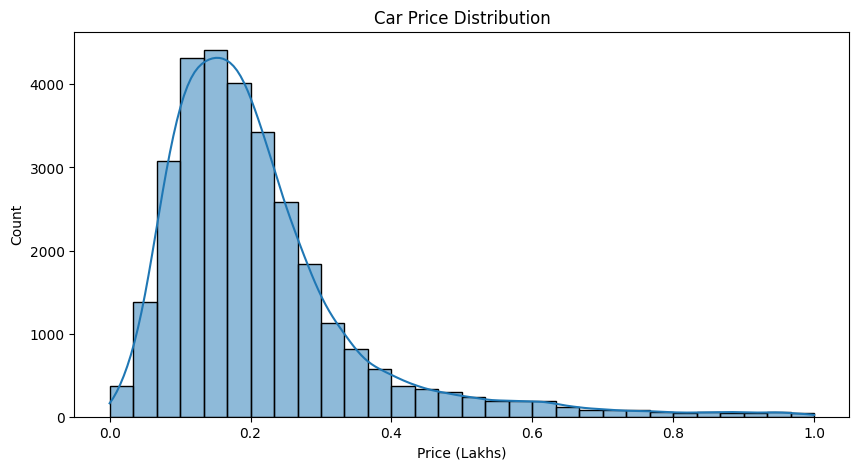

In [ ]:

plt.figure(figsize=(10,5))
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Car Price Distribution")
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count")
plt.show()

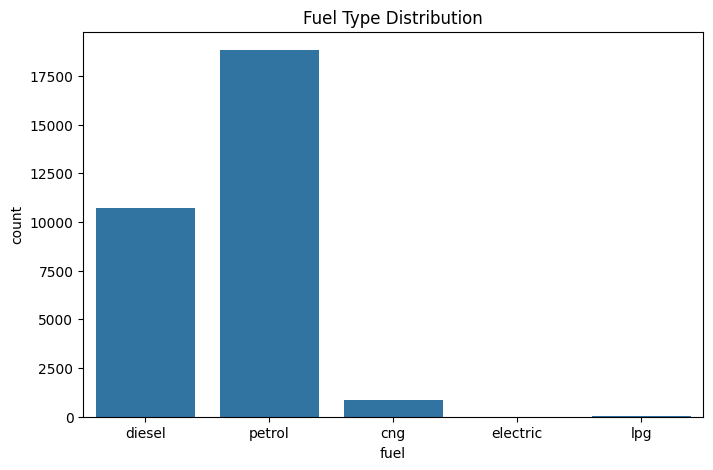

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="fuel", data=df)
plt.title("Fuel Type Distribution")
plt.show()

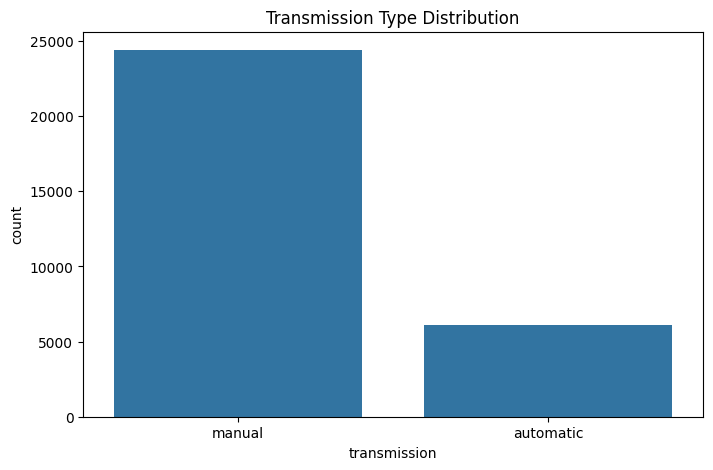

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="transmission", data=df)
plt.title("Transmission Type Distribution")
plt.show()


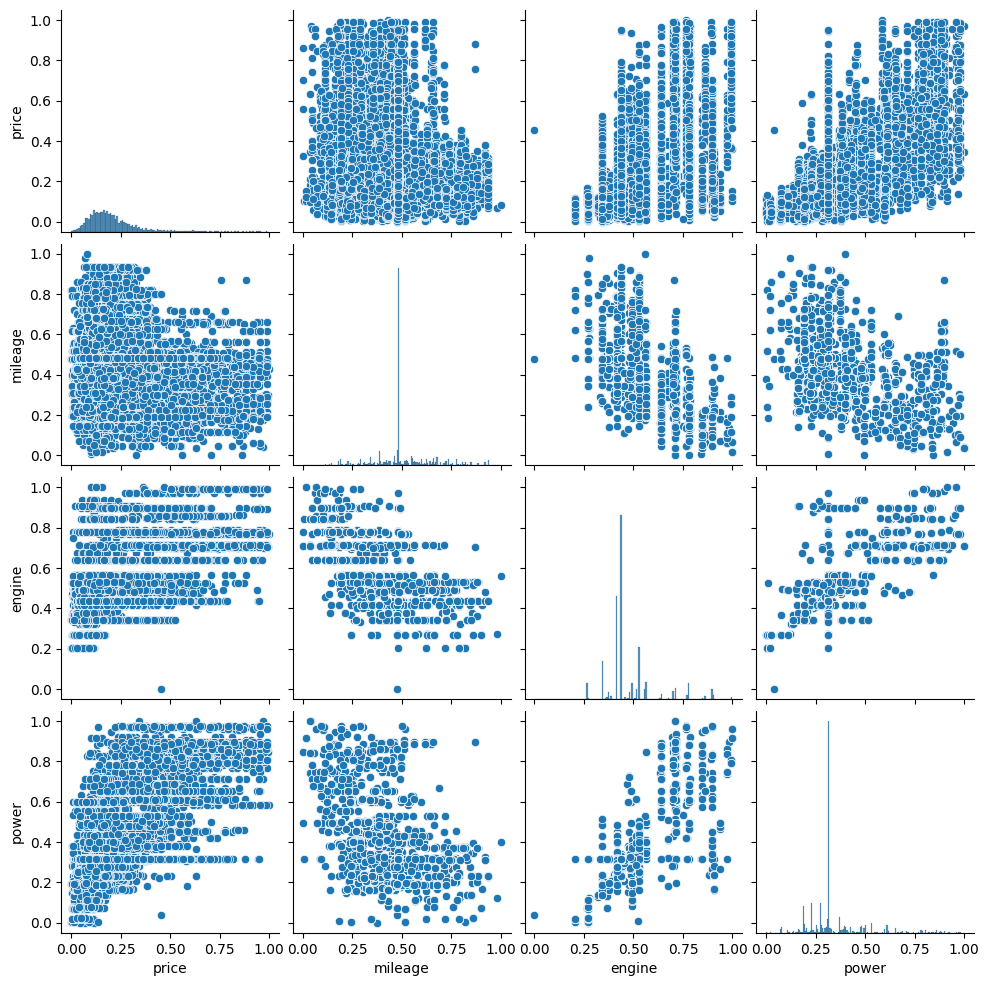

In [ ]:
 #Pairplot for relationships
sns.pairplot(df[["price", "mileage", "engine", "power"]])
plt.show()

# **5.Correlation Analysis**

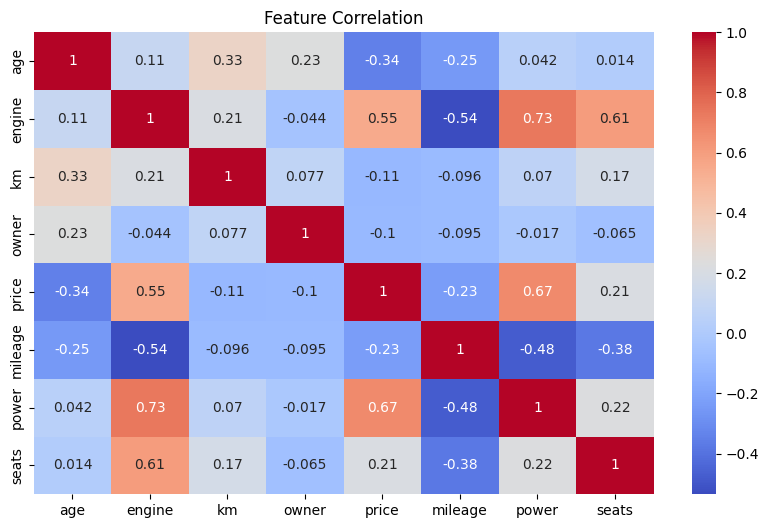

In [ ]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

# **6.Outlier Detection**

In [ ]:

num_features = ["mileage", "engine", "power", "price"]
z_scores = np.abs(stats.zscore(df[num_features]))
df = df[(z_scores < 3).all(axis=1)]  # Remove outliers

# **8.Dimensionality Reduction (PCA)**

In [ ]:

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[num_features])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.62392616 0.2205645 ]


# **9.Data Scaling (Min-Max Normalization)**

In [ ]:
#Data Scaling (Min-Max Normalization)
minmax_scaler = MinMaxScaler()
df[num_features] = minmax_scaler.fit_transform(df[num_features])

<ipython-input-20-10c0ff887d61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_features] = minmax_scaler.fit_transform(df[num_features])


# **10.Initial Modeling & Hypothesis Testing**

In [ ]:
# Step 11: Initial Modeling & Hypothesis Testing
X = df[["mileage", "engine", "power"]]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:\n MAE: {mae:.2f} \n R2 Score: {r2:.2f}")


Model Performance:
 MAE: 0.05 
 R2 Score: 0.72
